1. Import the necessary libraries for data visualisation and setting up the convolutional neural network architecture and preprocessing.


In [1]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')


2. Mount Google Drive to load and unzip the files and datasets.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_dir = '/content/drive/MyDrive/vehicles'
file_dir

'/content/drive/MyDrive/vehicles'

In [4]:
data_dir = '/content/drive/MyDrive/vehicles.zip'
data_dir

'/content/drive/MyDrive/vehicles.zip'

3. Retrieve the quantity of images represented through 5 vehicle classes (Bus, Car, Heavy Truck, Light Truck, Motorcycle), found in the training and testing folder respectively.

In [5]:
import os
train_dir = '/content/drive/MyDrive/vehicles/Dataset/train'
test_dir = '/content/drive/MyDrive/vehicles/Dataset/test'
print("Train folder:", train_dir)
print("Test folder:", test_dir)

for folder in [train_dir, test_dir]:
    print("\n", folder)
    for cls in os.listdir(folder):
        print(" ", cls, ":", len(os.listdir(os.path.join(folder, cls))), "images")

Train folder: /content/drive/MyDrive/vehicles/Dataset/train
Test folder: /content/drive/MyDrive/vehicles/Dataset/test

 /content/drive/MyDrive/vehicles/Dataset/train
  Bus : 876 images
  Car : 1143 images
  Heavy_truck : 1585 images
  light_truck : 442 images
  motorcycle : 433 images

 /content/drive/MyDrive/vehicles/Dataset/test
  Bus : 220 images
  Car : 286 images
  Heavy_truck : 397 images
  light_truck : 111 images
  motorcycle : 109 images


4. Split the dataset into training and testing sets, and manually creating them via data loading with an advanced Keras preprocessing utility to generate the dataset from image files on the Drive disk.

In [6]:
# Split the dataset into training and testing sets
train_size = 0.9
val_size = 0.1
test_size = 0.1

In [7]:
image_size = (180, 180)
batch_size = 32

# Create training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=image_size,
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True
)

# Create validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=image_size,
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False
)

class_names = train_ds.class_names
print("Class names:", class_names)

Found 4479 files belonging to 5 classes.
Found 1123 files belonging to 5 classes.
Class names: ['Bus', 'Car', 'Heavy_truck', 'light_truck', 'motorcycle']


5. Data normalisation and image resizing. Exploring the shapes for images, labels within the training and validation datasets respectively.
  The final process include collecting the quantity of training batches for training and validation.

In [8]:
def normalize_img(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = train_ds.map(normalize_img)
val_ds = val_ds.map(normalize_img)


In [9]:
# Get first batch of images and labels from the training dataset
for images, labels in train_ds.take(1):
    print("Shape of a batch of images:", images.shape)
    print("Shape of a batch of labels:", labels.shape)

# Get first batch of images and labels from the validation dataset
for images, labels in val_ds.take(1):
    print("Shape of a batch of images for validation:", images.shape)
    print("Shape of a batch of labels for validation:", labels.shape)

Shape of a batch of images: (32, 180, 180, 3)
Shape of a batch of labels: (32,)
Shape of a batch of images for validation: (32, 180, 180, 3)
Shape of a batch of labels for validation: (32,)


In [10]:
# Take a single batch to check min/max values after normalization
for images, _ in train_ds.take(1):
    print("Min pixel value in a batch:", tf.reduce_min(images).numpy())
    print("Max pixel value in a batch:", tf.reduce_max(images).numpy())

Min pixel value in a batch: 0.0
Max pixel value in a batch: 1.0


In [11]:
print('Number of training batches:', tf.data.experimental.cardinality(train_ds).numpy())
print('Number of validation batches:', tf.data.experimental.cardinality(val_ds).numpy())

Number of training batches: 140
Number of validation batches: 36


6. Perform Exploratory Data Analysis (EDA) by loading the dataset through a dataframe and creating data visualisations. The dataframe showcases the image with its class and weight.

In [12]:
df = pd.read_csv('/content/drive/MyDrive/vehicles/Dataset/labels_train.csv')
df.head(51)

,filename,class,weight
0,img_0256.jpg,light_truck,2080.16
1,img_0211.jpg,light_truck,3075.47
2,img_0464.jpg,light_truck,2342.76
3,img_0538.jpg,light_truck,2138.39
4,img_0482.jpg,light_truck,1951.47
5,img_0301.jpg,light_truck,2745.35
6,img_0421.jpg,light_truck,2972.97
7,img_0243.jpg,light_truck,2793.48
8,img_0469.jpg,light_truck,3448.43
9,img_0510.jpg,light_truck,2421.50


7. Bar chart representing the training class distribution for each of the 5 vehicle classes respectively. The quantity of light truck and motorcycle differs by a slight margin, which creates an overall balanced dataset.

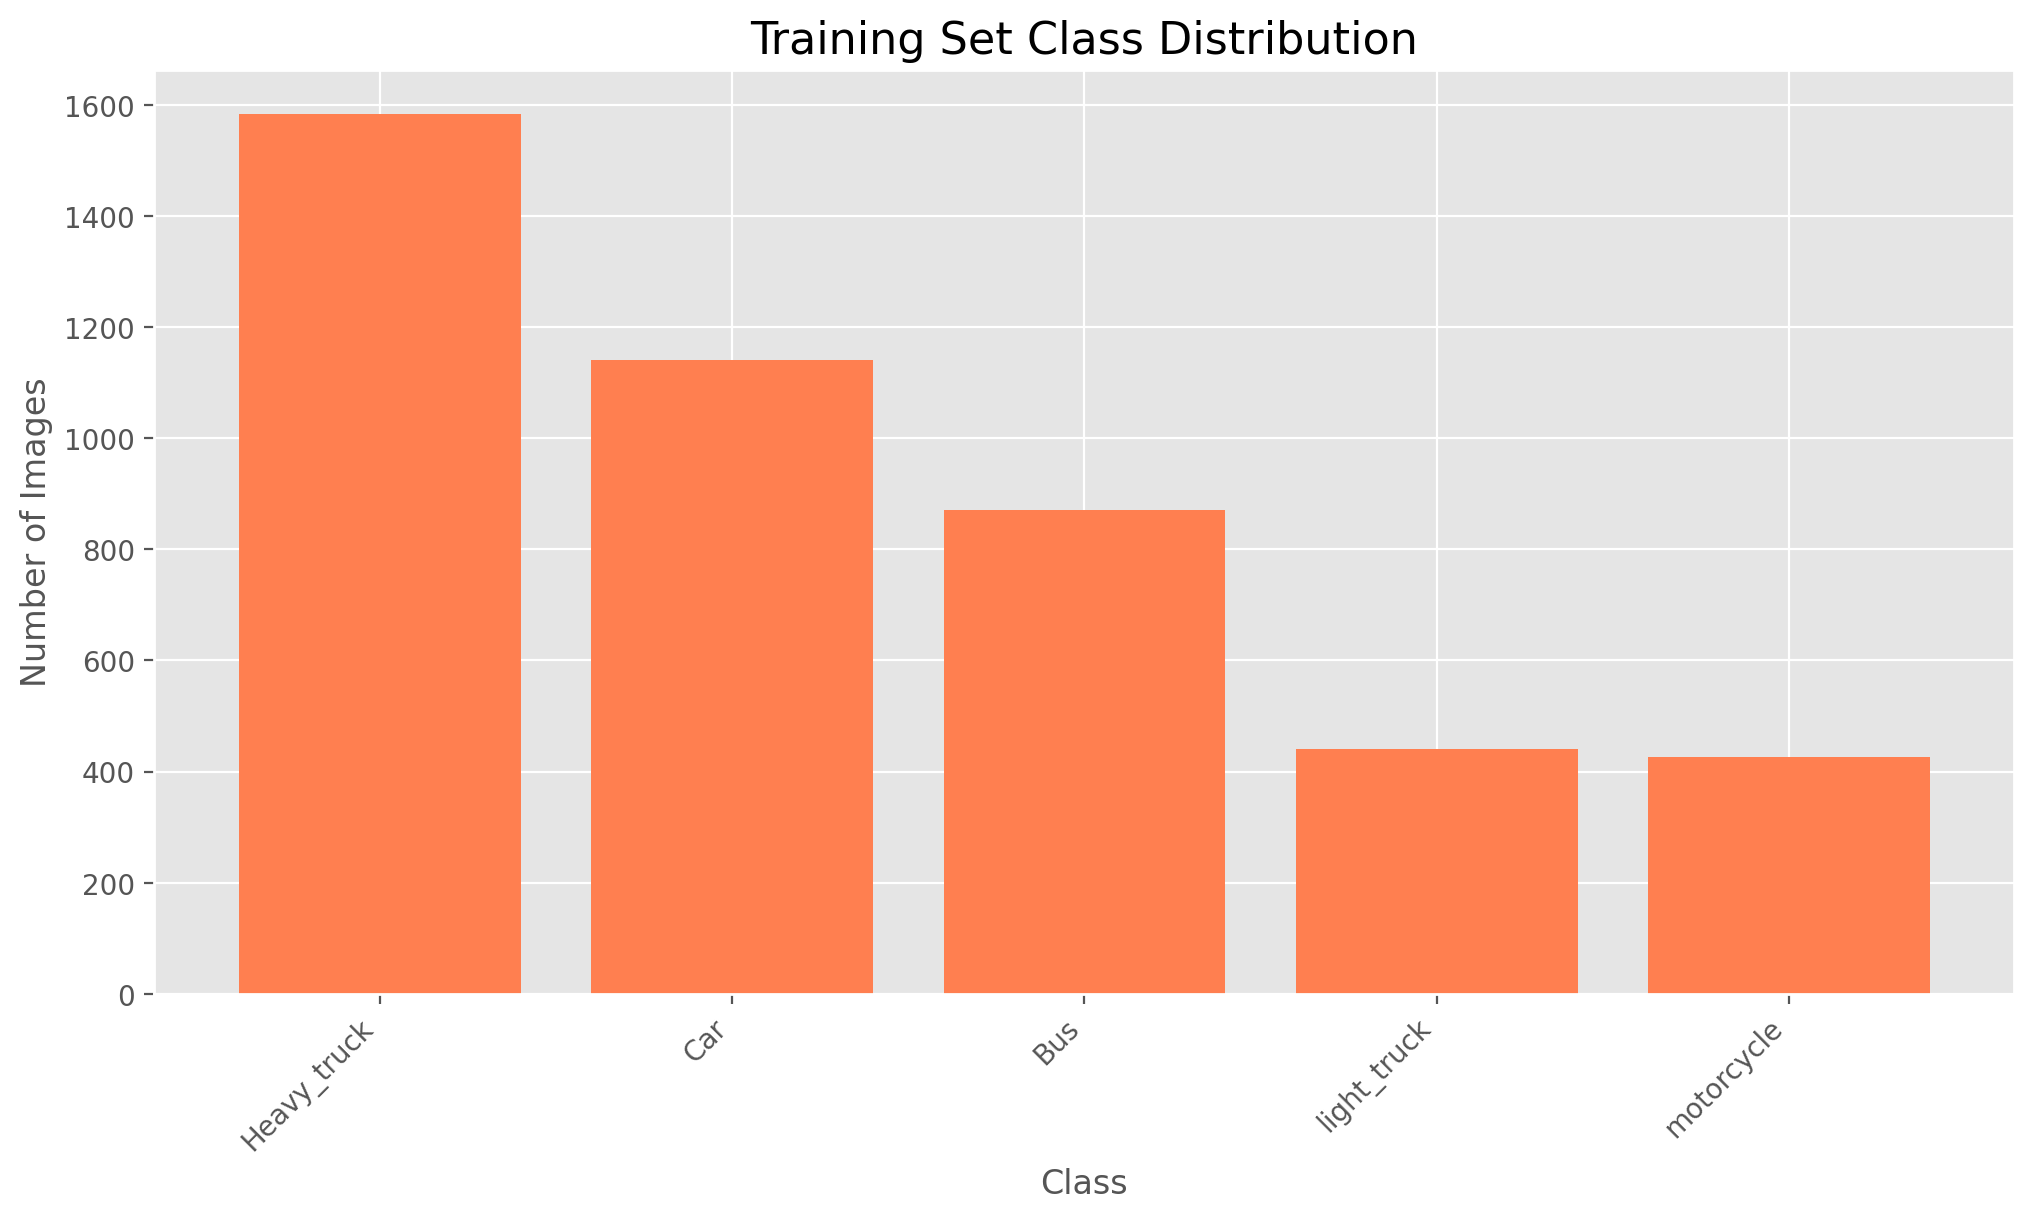

In [13]:
plt.figure(figsize=(12, 6))
train_class_counts = df['class'].value_counts()
plt.bar(train_class_counts.index, train_class_counts.values, color='coral')
plt.title('Training Set Class Distribution', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

8. Box plot representing the vehicle's weight distribution by class.

    Motorcycle Distribution (lightest)
    * The box is extremely flat, indicating significantly low variance.
    * Most data points are clustered near the zero-mark, representing weights between 150 kilograms to 500 kilograms.

    Car Distribution
    * Positioned slightly above motorcycles but has a lower distribution than light trucks.
    *  The Interquartile Range (IQR) is wider than the motorcycle class, implying a broader range of vehicle sizes (compacts, full-size sedans).
    *  The median lies between 1,000 kilograms to 2,000 kilograms.

/tmp/ipython-input-2583220354.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='weight', data=df, palette='Set3')


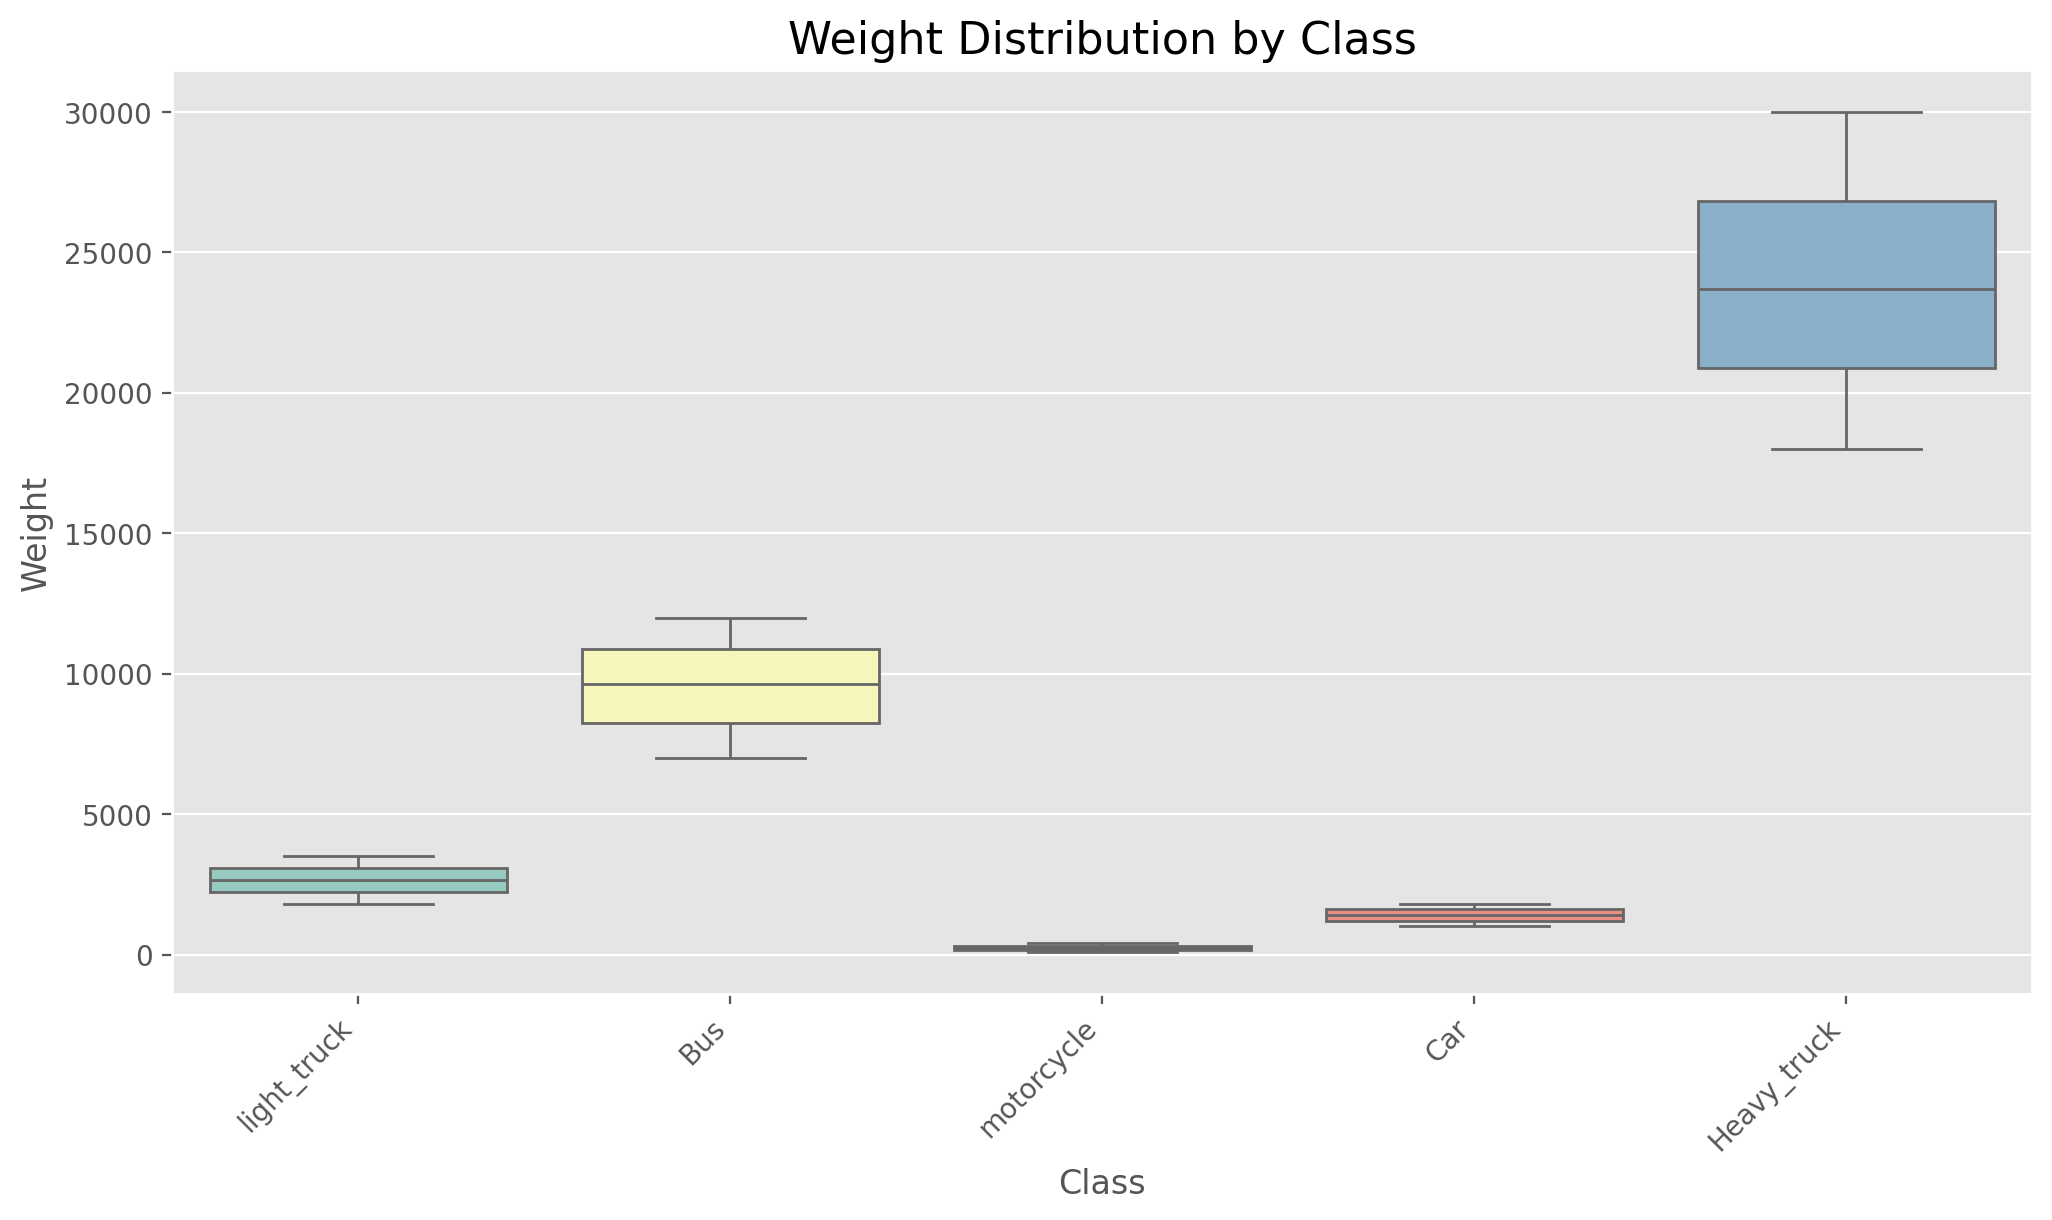

In [14]:
# Box plots of the weights for the 5 vehicle classes
plt.figure(figsize=(12, 6))
sns.boxplot(x='class', y='weight', data=df, palette='Set3')
plt.title('Weight Distribution by Class', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Weight', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()


9. Pie chart representing the distribution of the training set class distribution. The percentage representing the motorcycle training class and light truck distribution are 9.6% and 9.9% respectively, which balances the overall dataset despite the marginal difference of 0.3%.

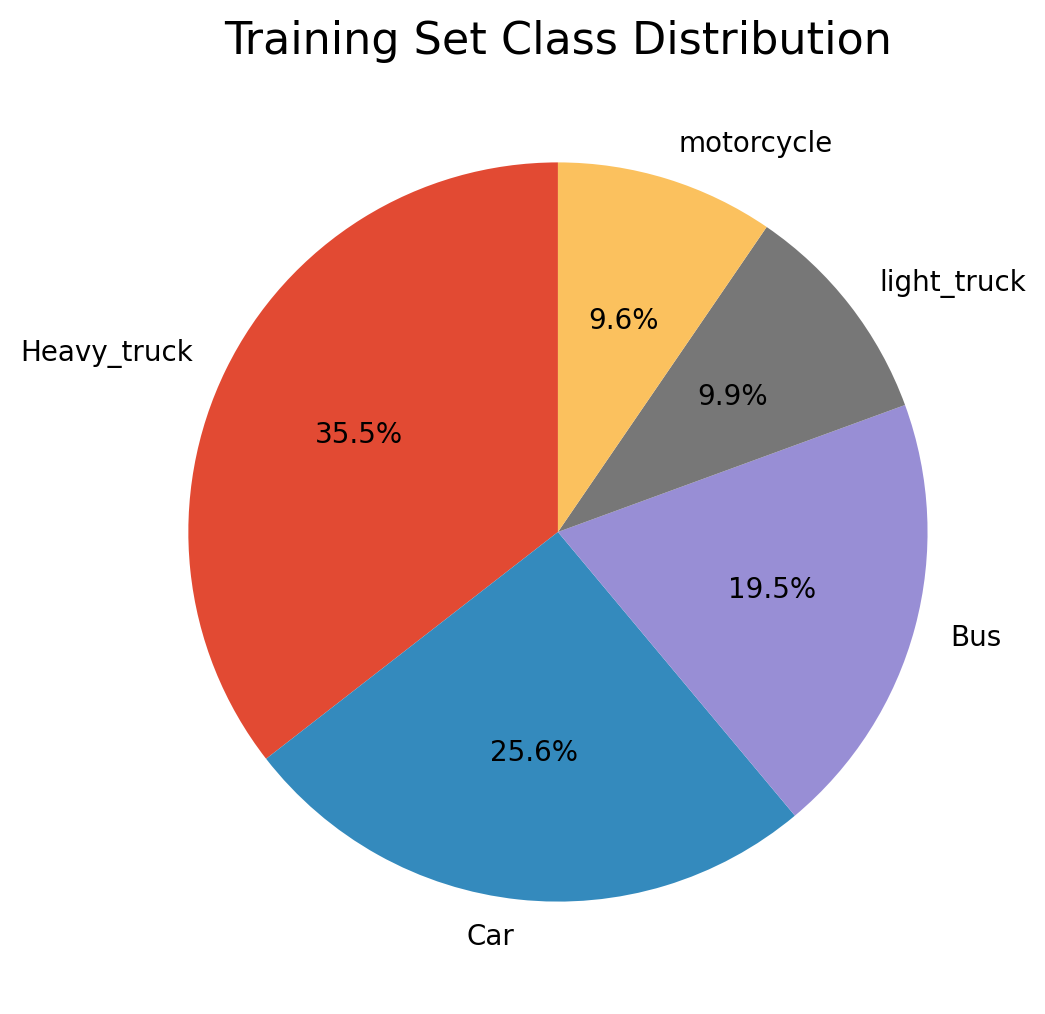

In [15]:
# Pie chart
plt.figure(figsize=(12, 6))
plt.pie(train_class_counts.values, labels=train_class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Training Set Class Distribution', fontsize=16)
plt.show()

10. Show a few sample images from each vehicle class, represented in a few rows.


--- Sample Images per Class ---


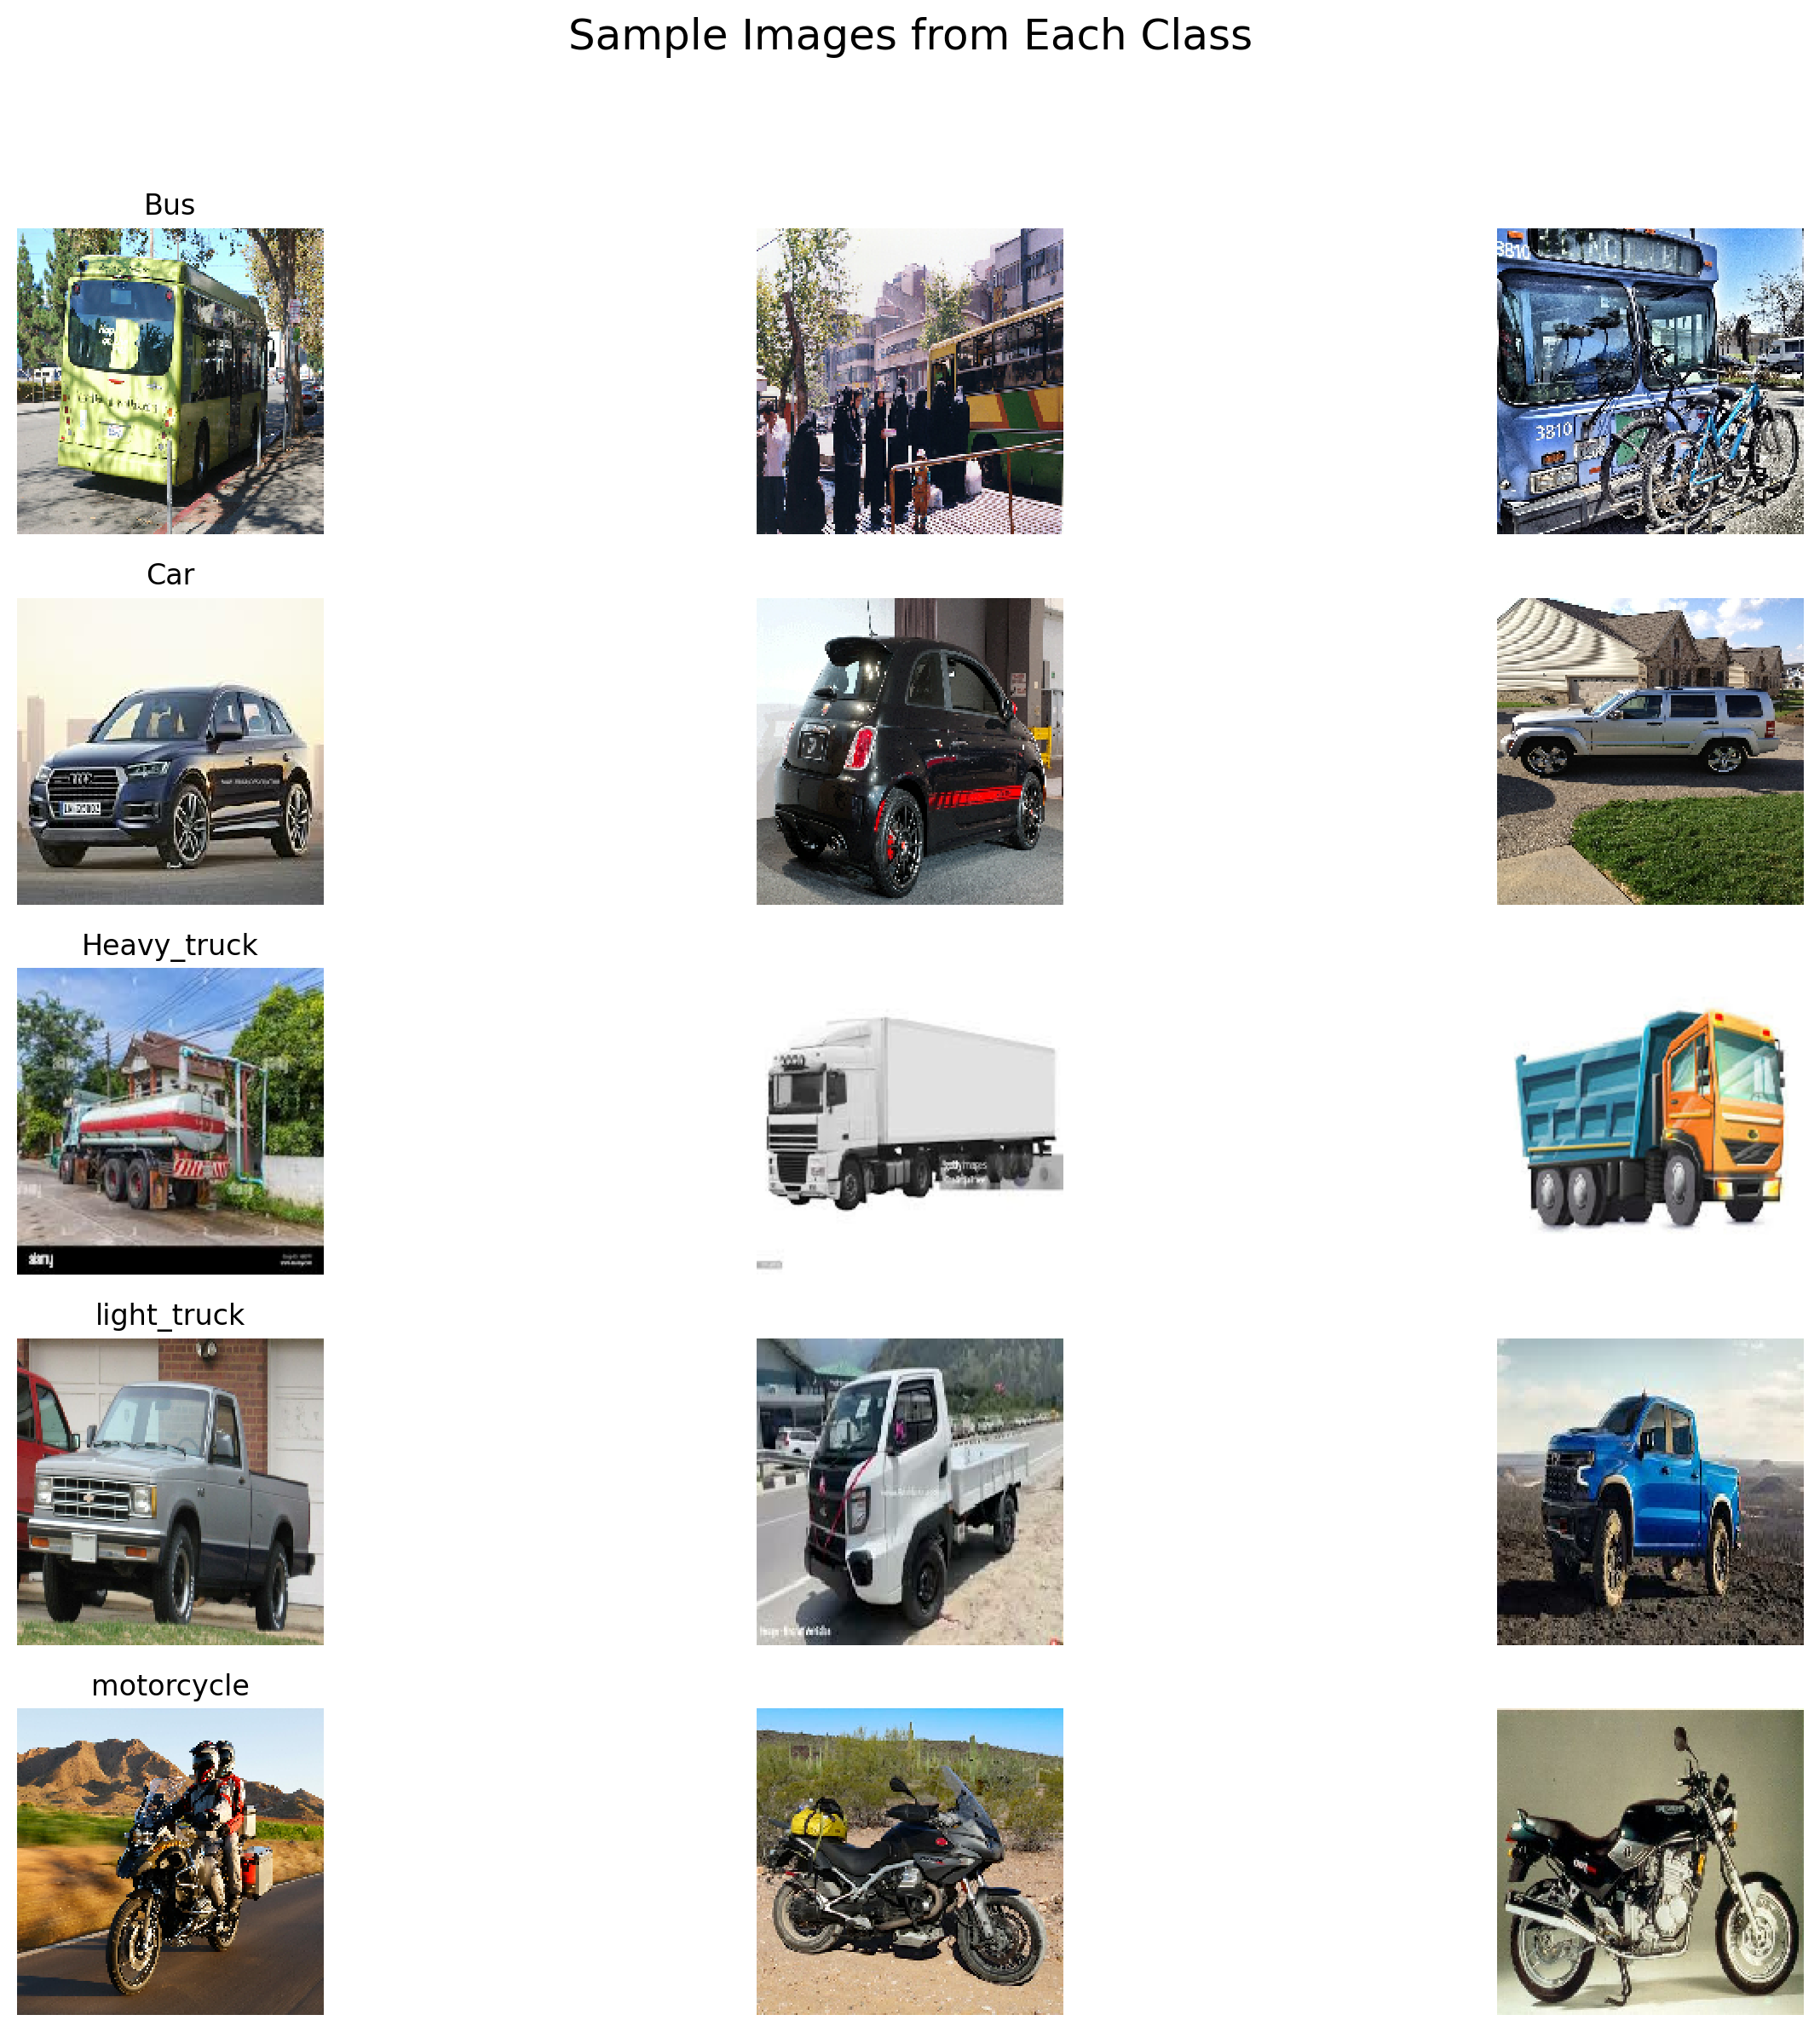

In [16]:
print("\n--- Sample Images per Class ---")
plt.figure(figsize=(15, 12))
num_samples_per_class = 3
samples_collected = {cls_idx: [] for cls_idx in range(len(class_names))}

# Iterate through the training dataset to collect samples
# Ensure to use a fresh iterator if train_ds was already consumed
for images, labels in train_ds:
    for img_idx in range(images.shape[0]): # Iterate through images in the batch
        label = labels.numpy()[img_idx]
        if len(samples_collected[label]) < num_samples_per_class:
            samples_collected[label].append(images.numpy()[img_idx])

    # Check if we have collected enough samples for all classes
    all_classes_full = True
    for cls_idx in range(len(class_names)):
        if len(samples_collected[cls_idx]) < num_samples_per_class:
            all_classes_full = False
            break
    if all_classes_full:
        break

# Plot the collected samples
for i, class_name in enumerate(class_names):
    for j in range(min(num_samples_per_class, len(samples_collected[i]))):
        ax = plt.subplot(len(class_names), num_samples_per_class, i * num_samples_per_class + j + 1)
        # Clip pixel values to [0, 1] for proper display if they are float
        plt.imshow(np.clip(samples_collected[i][j], 0, 1))
        if j == 0: # Only put title on the first image of the row
            plt.title(f'{class_name}', fontsize=12)
        plt.axis('off')
plt.suptitle('Sample Images from Each Class', fontsize=18, y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

11. Create the Lenet-5 CNN Architecture Model with a class named VehicleClassifierModel. The model undergoes optimisation to configure the model before training. There are 5 classes in total for the final softmax function to compute probabilities from 0 to 1 of vehicle classes.

    The loss value is set to sparse categorical crossentropy as it is widely used for multiclass classification which handles integer class labels (1,2,3,4,5) for the vehicles, and avoid the process of converting embeddings into one-hot encoded vectors, making it fast and memory-efficient.

    Batch normalization is implemented to serve as a regularizer by normalizing layer inputs within a mini-batch, data is scaled to the center using learned parameters (gamma, beta) for each feature, reducing internal covariance shift (changing input distribution) and stabilizing gradients, hence preventing vanishing or exploding gradients, making the optimisation process smoother, allowing for increased learning rates, quicker convergence and better generalisation.

In [17]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.optimizers import Adam

class VehicleClassifierModel:
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build_model(self):
        model = Sequential()


        model.add(Conv2D(32, (3, 3), activation='relu', input_shape=self.input_shape, padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))


        model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))


        model.add(Flatten())
        model.add(Dropout(0.4))
        model.add(Dense(256, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(optimizer=Adam(learning_rate=0.0005),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        return model


In [18]:
vehicle_model = VehicleClassifierModel(input_shape=(180, 180, 3), num_classes=len(class_names))
model = vehicle_model.build_model()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

12. Gather the model output shape and number of parameters for every layer in the CNN model, before declaring a batch size of 128, the number of epochs to 5, and the number of classes to be 5 for model training.

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 180, 180, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 90, 90, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 45, 45, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    15,859,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,955,397 (60.87 MB)

 Trainable params: 15,954,949 (60.86 MB)

 Non-trainable params: 448 (1.75 KB)

In [21]:
batch_size = 128
epochs = 5
number_classes = len(class_names)

13. Model training takes place and 2 plots are shown after training, representing the model accuracy for training and validation data, and the training and validation loss respectively. The validation accuracy and the gap between the train and validation plots helps to measure whether the model is overfitting. The higher the accuracy and lower the loss value, the model performs better.

In [22]:
model_history = model.fit(train_ds,
                          validation_data=val_ds,
                          epochs=epochs,
                          batch_size=batch_size,
                         )

Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 699s 5s/step - accuracy: 0.5699 - loss: 1.7670 - val_accuracy: 0.3535 - val_loss: 4.9629
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 625s 4s/step - accuracy: 0.7900 - loss: 0.5935 - val_accuracy: 0.5120 - val_loss: 2.7047
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 650s 5s/step - accuracy: 0.8612 - loss: 0.3782 - val_accuracy: 0.6687 - val_loss: 1.2976
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 667s 5s/step - accuracy: 0.9077 - loss: 0.2499 - val_accuracy: 0.7934 - val_loss: 0.6361
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 626s 4s/step - accuracy: 0.9375 - loss: 0.1765 - val_accuracy: 0.8166 - val_loss: 0.6007


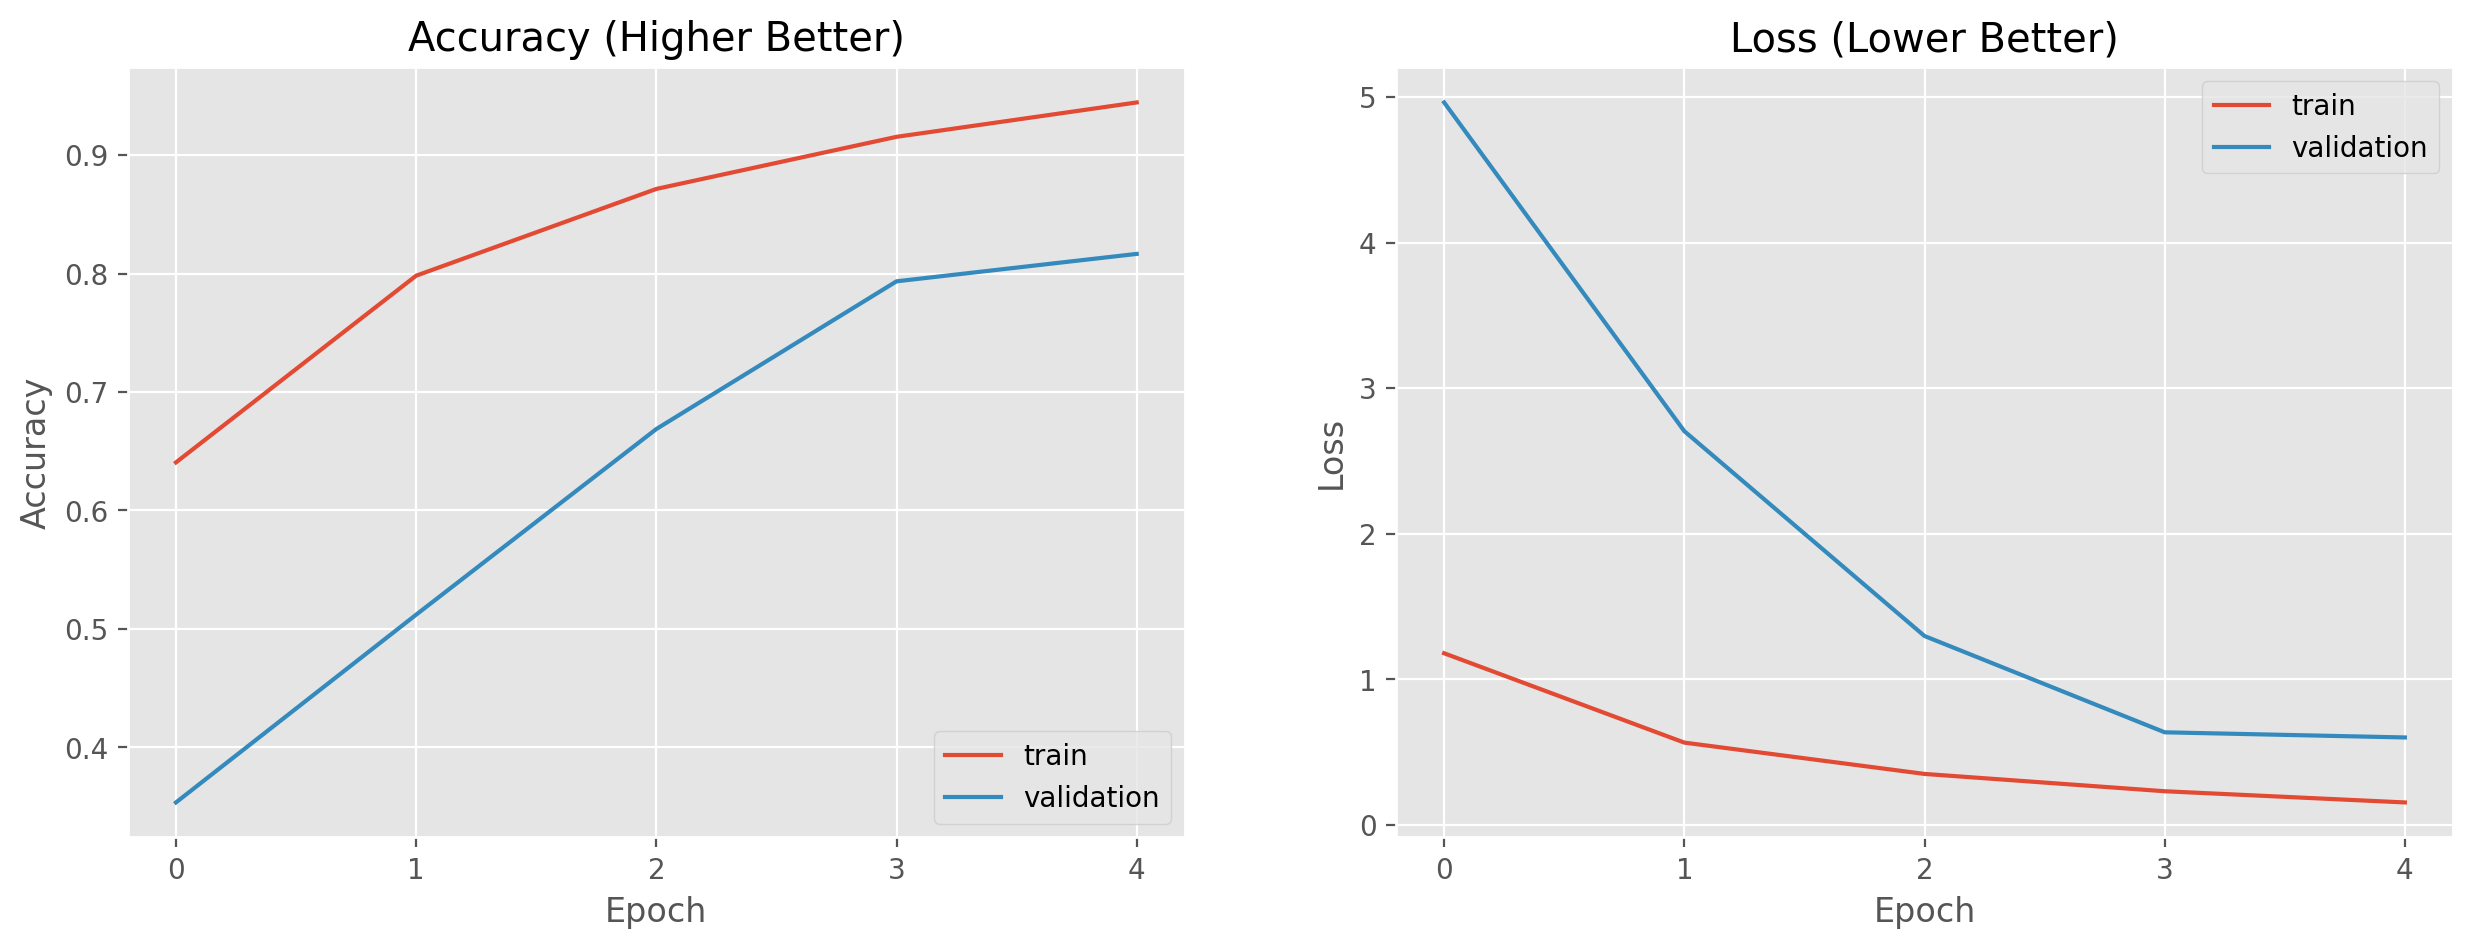

In [23]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_history.history['accuracy'])
ax1.plot(model_history.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_history.history['loss'])
ax2.plot(model_history.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

14. Evaluate the model metrics for test loss, accuracy, model predictions, alongside the quantity of misclassified images found within incorrect vehicle classes and showcase a few misclassified images.

In [24]:
x_test = keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=image_size,
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False)

y_test = np.concatenate([y for x, y in x_test], axis=0)
x_test = np.concatenate([x for x, y in x_test], axis=0)

model_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', model_score[0])
print('Test accuracy:', model_score[1])

Found 1123 files belonging to 5 classes.
Test loss: 394.78118896484375
Test accuracy: 0.5405164957046509


In [25]:
predicted_probabilities = model.predict(val_ds)
predicted_classes = np.argmax(predicted_probabilities, axis=1)
print(predicted_classes)

36/36 ━━━━━━━━━━━━━━━━━━━━ 33s 890ms/step
[0 2 0 ... 4 4 4]


In [26]:
predict = model.predict(val_ds)
print(predict)

36/36 ━━━━━━━━━━━━━━━━━━━━ 33s 882ms/step
[[9.27605748e-01 2.13740603e-03 6.95625842e-02 1.54615176e-04
  5.39630360e-04]
 [3.40549469e-01 8.45170245e-02 3.72696936e-01 2.00268298e-01
  1.96835306e-03]
 [5.00526607e-01 3.34416419e-01 1.58416852e-01 6.34142989e-03
  2.98572500e-04]
 ...
 [1.98232719e-08 2.31936710e-07 7.43084911e-07 1.03678076e-07
  9.99998927e-01]
 [1.25144135e-08 7.00732095e-09 2.72663158e-07 5.08992670e-08
  9.99999642e-01]
 [3.71300907e-10 1.27623800e-09 1.23402666e-09 6.40354825e-10
  1.00000000e+00]]


In [27]:
true_labels = []
true_images = []
for images, labels in val_ds:
    true_labels.extend(labels.numpy())
    true_images.extend(images.numpy())

true_labels = np.array(true_labels)
true_images = np.array(true_images)

error_x = np.where(predicted_classes != true_labels)[0]
error_y = predicted_classes[error_x]
print(error_x)
print(error_y)

[   1    4    5    9   13   16   17   26   33   34   39   45   53   54
   57   60   66   74   78   85   89   92   97  101  103  104  116  119
  125  128  131  133  143  146  148  150  152  156  157  158  160  162
  166  179  180  181  182  194  196  197  204  206  209  210  212  217
  219  225  226  233  237  241  244  251  253  254  259  260  269  272
  286  290  291  292  294  307  311  315  318  320  325  335  338  339
  349  353  358  368  376  378  391  394  398  401  423  427  429  434
  437  438  442  443  446  457  459  461  464  465  468  469  472  473
  476  484  485  486  494  496  497  503  504  572  585  594  662  685
  716  735  740  743  846  848  859  896  904  905  906  908  909  910
  911  913  915  916  920  921  922  923  924  925  926  927  929  930
  931  932  933  937  940  942  944  945  946  947  951  952  953  954
  956  957  958  959  960  961  963  964  965  967  968  969  970  972
  973  976  977  978  979  980  981  987  988  989  990  994  995  997
  998 

In [28]:
error_x.shape

(206,)

15. 5 misclassifed images are shown, which are revealed to be dark images. As there are no features or edges to detect for the vehicles, it is unable to classify the image into a vehicle class, hence creating a major difference between the model training and the model's testing accuracy and loss value. This is because of the model's shift in covariate (distribution).

  * Covariate (Distribution) Shift: The primary reason for the gap between training and testing performance is a covariate shift. The model is trained on high-visibility datasets but was tested on dark images, it met a data distribution that it has not "encountered." This causes the testing loss to spike as the model’s internal weights—optimized for bright-light features—fail to find corresponding patterns in the dark input.

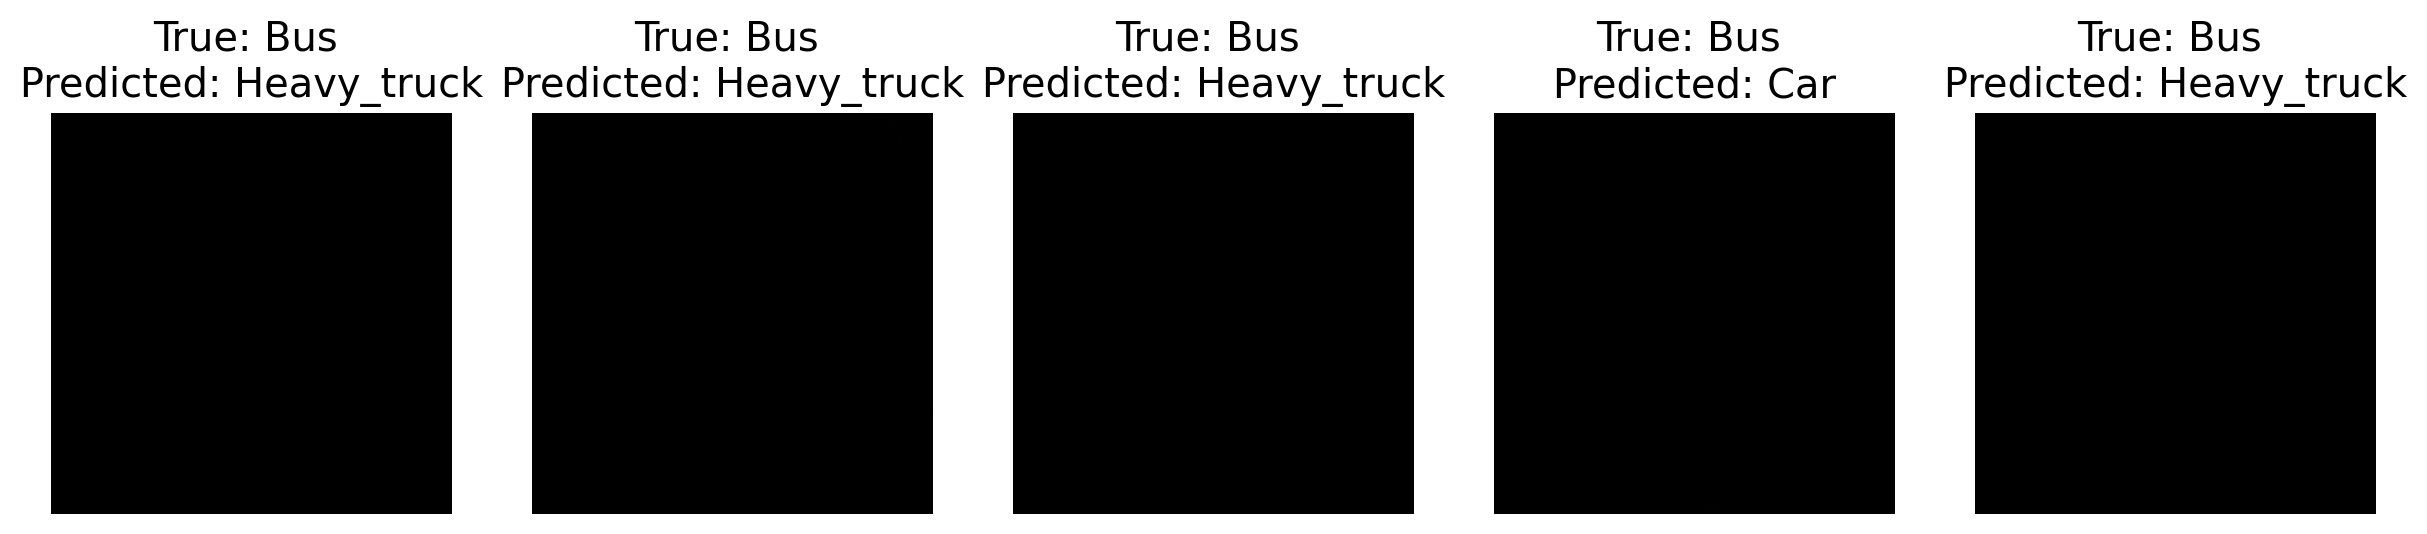

In [29]:
# Provide a few examples of misclassified images
num_errors_to_display = 5
plt.figure(figsize=(15, 10))
for i in range(num_errors_to_display):
    ax = plt.subplot(1, num_errors_to_display, i + 1)
    plt.imshow(true_images[error_x[i]].astype("uint8"))
    plt.title(f"True: {class_names[true_labels[error_x[i]]]} \nPredicted: {class_names[error_y[i]]}")
    plt.axis("off")

16. The heatmap confusion matrix is displayed to represent the model's classification performance, using color intensity to show the number of correct (diagonal) versus incorrect (off-diagonal) predictions.

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 819ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 942ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 782ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 782ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 787ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step
1/1 ━━━

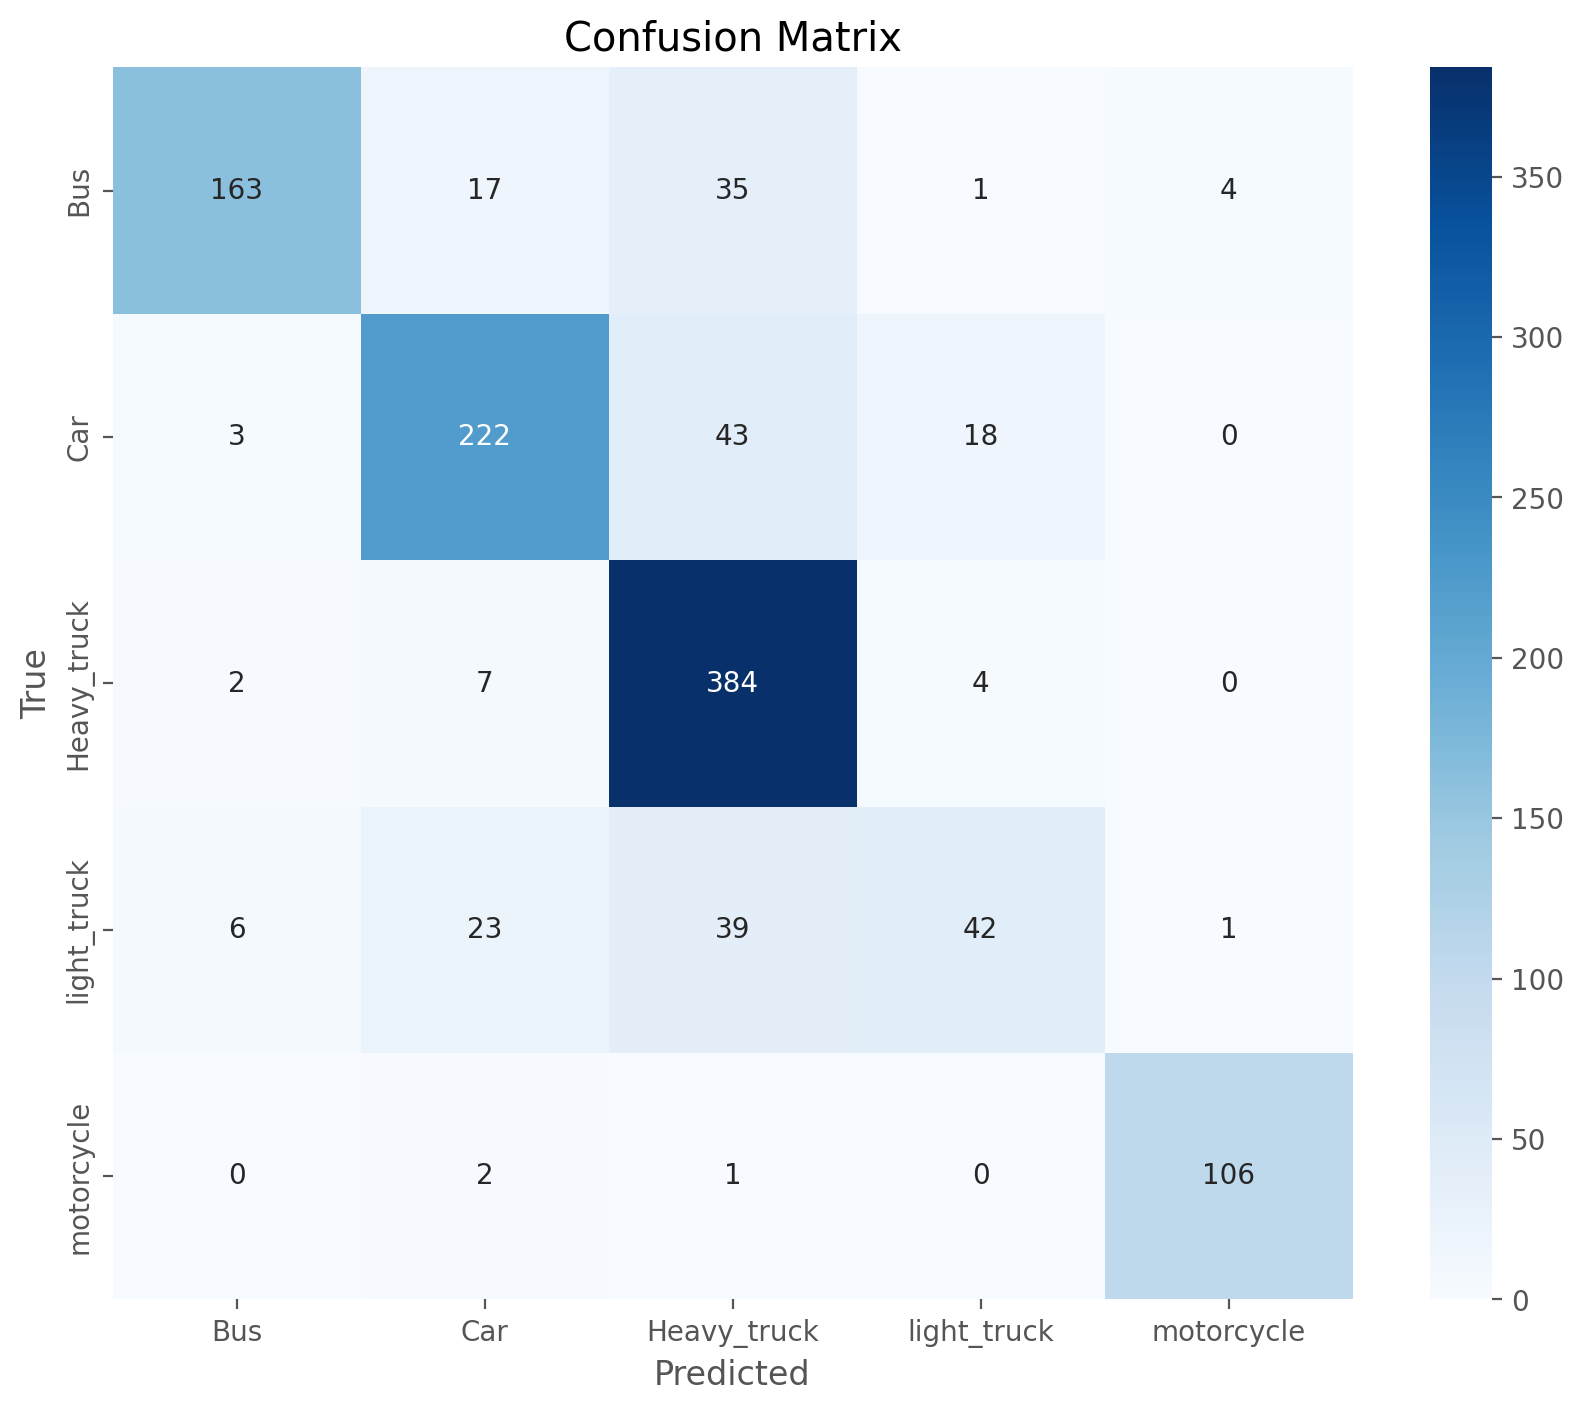

In [30]:
#Heatmap confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

heatmap = np.zeros((len(class_names), len(class_names)))
true_labels = []
predicted_labels = []

for images, labels in val_ds:
    true_labels.extend(labels.numpy())
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    for i in range(len(labels)):
        heatmap[labels[i]][np.argmax(predictions[i])] += 1

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap, annot=True, fmt='.0f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

17. Measure the model's performance to predict false positives and negatives via precision and recall score respectively. The F1 score is used to compute the overall model performance by multiplying the product of the precision and recall score, over the sum of precision and recall in a classification report.

In [31]:
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f'Precision: {precision:.4f}','%')
print(f'Recall: {recall:.4f}','%')
print(f'F1 Score: {f1:.4f}','%')

Precision: 0.8191 %
Recall: 0.8166 %
F1 Score: 0.8078 %


In [32]:
conf_matrix = classification_report(true_labels, predicted_labels, target_names=class_names)
print(conf_matrix)

              precision    recall  f1-score   support

         Bus       0.94      0.74      0.83       220
         Car       0.82      0.78      0.80       286
 Heavy_truck       0.76      0.97      0.85       397
 light_truck       0.65      0.38      0.48       111
  motorcycle       0.95      0.97      0.96       109

    accuracy                           0.82      1123
   macro avg       0.82      0.77      0.78      1123
weighted avg       0.82      0.82      0.81      1123



18. Further Improvements & Enhancements for Assignment Part 2:
    
    *Transfer Learning: Use different CNN pretrained models, such as MobileNetV2 or EfficientNet to increase the miodel performance to 90% and above, as well as making enhanced vehicle classification predictions.
    
    *Data Augmentation: Altering the dimensions of the images to capture the relevant edges and features in the vehicle images.

    *Hyperparameter Tuning: Optuna can be used for hyperparameter tuning by retrieving the best and optimal hyperparameters after techniques such as randomised search, or early stopping.

    *Ensemble Learning: Incorporate ensemble learning alogorithms such as XGBoost or Random Forest Regressor to increase model accuracy, robustness, and reduce variance for overfitting and improve generalisation.